<a href="https://colab.research.google.com/github/chaima-mehri/DataScience_TP/blob/main/Exploration_dynamique_des_donn%C3%A9es_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importer pandas et de matplotlib pour la lecture de données en python et la constructions de quelques représentations graphiques avec matplotlib.
import pandas as pd
import matplotlib
# le module pyplot de la bibliothèque matplotlib qui nous permettra de faire des graphes.
import matplotlib.pyplot as plt
#
import numpy as np
import seaborn as sns
#
%matplotlib inline
#Lire le fichier à l’aide de la fonction read_csv()
df = pd.read_csv('Evolution_structure_population.csv', sep=';')
# préciser également que LIBGEO, le nom de la commune, sera utilisé comme index de la DataFrame de pandas. Chaque ligne portera alors le nom de la ville correspondante
df = df.set_index('libgeo')
#Afficher Data Frame
df



,ccodgeo,reg,dep,arr,cv,ze2010,id_modif_geo,p11_pop,p99_pop,d90_pop,...,c10_pop55p,c10_pop55p_cs1,c10_pop55p_cs2,c10_pop55p_cs3,c10_pop55p_cs4,c10_pop55p_cs5,c10_pop55p_cs6,c10_pop55p_cs7,c10_pop55p_cs8,evol99_11
libgeo,,,,,,,,,,,,,,,,,,,,,
ARTIGUELOUTAN,64059,72,64,643,6431,7214,ZZZZZZ,944,722.0,669,...,256,8,4,8,12,16,12,180,16,"30.7479224376731302"""
BILLERE,64129,72,64,643,6451,7214,ZZZZZZ,13343,13390.0,12570,...,4245,9,47,188,185,289,101,3150,276,-0.35100821508588498880
BIZANOS,64132,72,64,643,6447,7214,ZZZZZZ,4773,4674.0,4298,...,1754,0,40,124,80,52,44,1337,76,2.1181001283697047
GAN,64230,72,64,643,6446,7214,ZZZZZZ,5481,4961.0,4724,...,1890,12,55,95,103,69,40,1411,106,10.4817577101390849
GELOS,64237,72,64,643,6448,7214,ZZZZZZ,3620,3665.0,3529,...,1262,8,24,36,56,72,45,917,104,-1.2278308321964529
IDRON,64269,72,64,643,6431,7214,ZZZZZZ,4091,5151.0,2311,...,1144,0,38,100,96,59,13,763,75,-20.5785284410794021
JURANCON,64284,72,64,643,6446,7214,ZZZZZZ,7037,7381.0,7538,...,2494,0,44,104,164,124,96,1744,217,-4.6606150928058529
LEE,64329,72,64,643,6431,7214,ZZZZZZ,1213,779.0,446,...,300,0,4,51,16,8,4,199,20,55.7124518613607189
LESCAR,64335,72,64,643,6419,7214,ZZZZZZ,10030,8191.0,5793,...,2733,12,54,207,120,107,87,1912,233,22.4514711268465389


In [ ]:
#Graphique xy classique : représenter le nombre de naissances et de décés à Pau entre 1999 et 2011
#extraire les colonnes NAISXX et DECEXX du tableau global pour la ligne concernant Pau.

# noms des colonnes:
years = [99] + list(range(0, 12))
naissance = ["nais%02d" % y for y in years]
deces = ["dece%02d" % y for y in years]

# extraction de la ligne qui concerne Pau
df_pau = df[df.index == "PAU"].squeeze()

# nouvelle DataFrame avec les deces et les naissances à Pau en fonction des années
dfxy = pd.DataFrame(
    data={
        "naissance": df_pau[naissance].values,
        "deces": df_pau[deces].values
    },
    index=[1999 + i for i in range(0, 13)]
)
dfxy

,naissance,deces
1999,900,773
2000,981,744
2001,936,768
2002,897,759
2003,952,797
2004,932,772
2005,909,794
2006,984,784
2007,879,744
2008,906,774


<AxesSubplot:title={'center':'Naissances et décés à Pau entre 1999 et 2011'}>

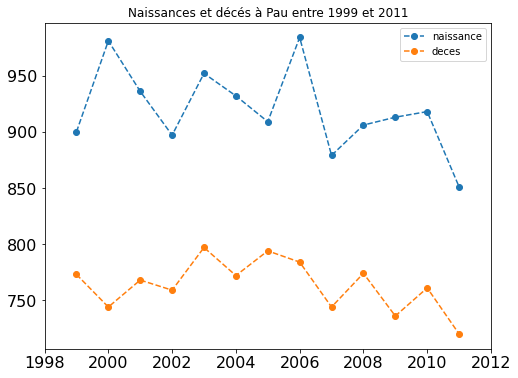

In [ ]:
 #tracer des courbes avec la fonction plot() de pandas
dfxy.plot(    marker='o',    linestyle='dashed',    title='Naissances et décés à Pau entre 1999 et 2011',  
              figsize=(8, 6),    fontsize=16,    xlim=(1998, 2012))


In [ ]:
columns = {
    "c10_pop15p_cs1": "agriculteurs",
    "c10_pop15p_cs2": "Artisans",
    "c10_pop15p_cs3": "Cadres",
    "c10_pop15p_cs4": "Intermédiaires",
    "c10_pop15p_cs5": "Employés",
    "c10_pop15p_cs6": "Ouvriers",
    "c10_pop15p_cs7": "Retraités",
    "c10_pop15p_cs8": "Autres"
}
df_cat = df[list(columns.keys())]
df_cat = df_cat.rename(columns=columns)
# add the sum over CAPP
df_cat.loc["CAPP"] = df_cat.sum(axis=0)
df_cat["total"] = df_cat.sum(axis=1)
df_cat

,agriculteurs,Artisans,Cadres,Intermédiaires,Employés,Ouvriers,Retraités,Autres,total
libgeo,,,,,,,,,
ARTIGUELOUTAN,24,20,40,164,140,72,184,80,724
BILLERE,18,245,908,1790,2270,1352,3178,1325,11086
BIZANOS,0,132,446,534,622,401,1337,578,4050
GAN,36,209,393,778,658,406,1415,450,4345
GELOS,20,127,246,483,498,293,921,491,3079
IDRON,4,159,507,554,436,193,763,587,3203
JURANCON,16,183,428,940,932,755,1761,900,5915
LEE,4,43,172,183,98,70,199,172,941
LESCAR,21,310,965,1342,1222,925,1920,1408,8113


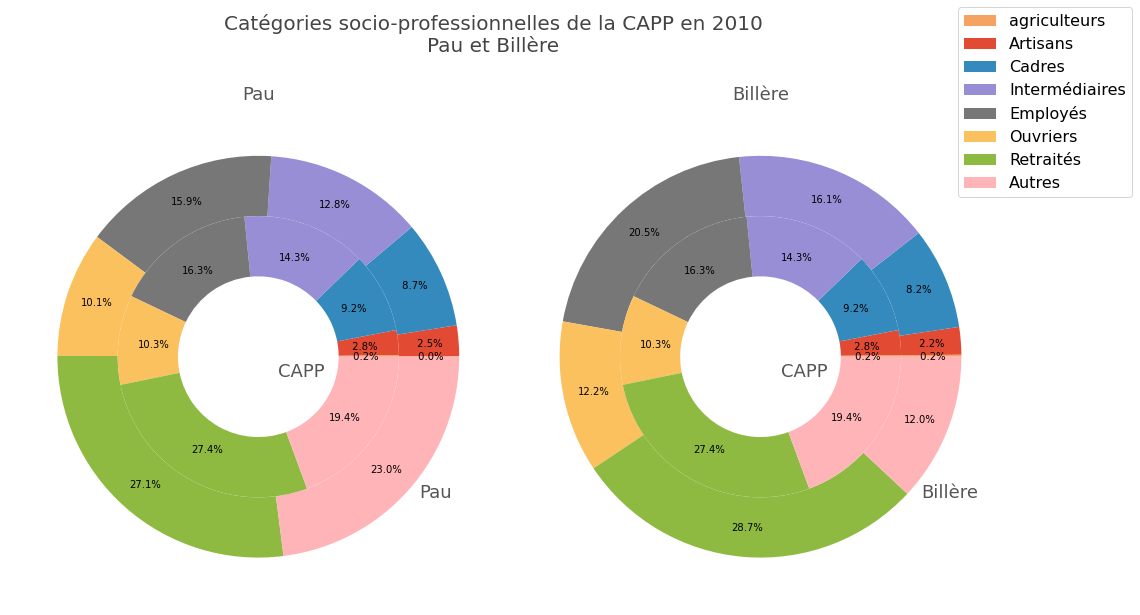

In [ ]:
fig = plt.figure(figsize=(18, 10))
fig.suptitle("Catégories socio-professionnelles de la CAPP en 2010\nPau et Billère", fontsize=20, color="#444444")
width = .3

# color scale
colors = ["#F4A460", '#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']

# PAU et CAPP
ax1 = fig.add_subplot(121, aspect="equal")
pau_pie = ax1.pie(
    # data
    df_cat.loc["PAU"].drop("total"),
    # wedges
    colors=colors,
    radius=1,
    wedgeprops={"width": width, "linewidth": 1},
    # labels
    autopct="%4.1f%%",
    pctdistance=.85
)
capp_pie = ax1.pie(
    df_cat.loc["CAPP"].drop("total"),
    colors=colors,
    radius=1 - width,
    wedgeprops={"width": width, "linewidth": 1},
    autopct="%4.1f%%",
    pctdistance=.75
)
ax1.set_title("Pau", fontsize=18, color="#555555")
ax1.text(.1, -.1, "CAPP", fontsize=18, color='#555555')
ax1.text(.8, -.7, "Pau", size=18, color='#555555')

# Billere et CAPP
ax2 = fig.add_subplot(122, aspect="equal")
bill_pie = ax2.pie(
    df_cat.loc["BILLERE"].drop("total"),
    colors=colors,
    radius=1,
    wedgeprops={"width": width, "linewidth": 1},
    autopct="%4.1f%%",
    pctdistance=.85
)
capp_pie = ax2.pie(
    df_cat.loc["CAPP"].drop("total"),
    colors=colors,
    radius=1 - width,
    wedgeprops={"width": width, "linewidth": 1},
    autopct="%4.1f%%",
    pctdistance=.75
)
ax2.set_title("Billère", fontsize=18, color="#555555")
ax2.text(.1, -.1, "CAPP", size=18, color='#555555')
ax2.text(.8, -.7, "Billère", size=18, color='#555555')

# legende
fig.legend(pau_pie[0], df_cat.columns.values, fontsize=16)
fig.subplots_adjust(wspace=0)
fig.savefig("capp_pie.png", dpi=300)
